In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
# Load Train Dataset
train_df = pd.read_csv("./processed_data/preprocessed_train_data.csv")
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
TicketNum      0
TicketStr      0
FamilySize     0
Title          0
dtype: int64

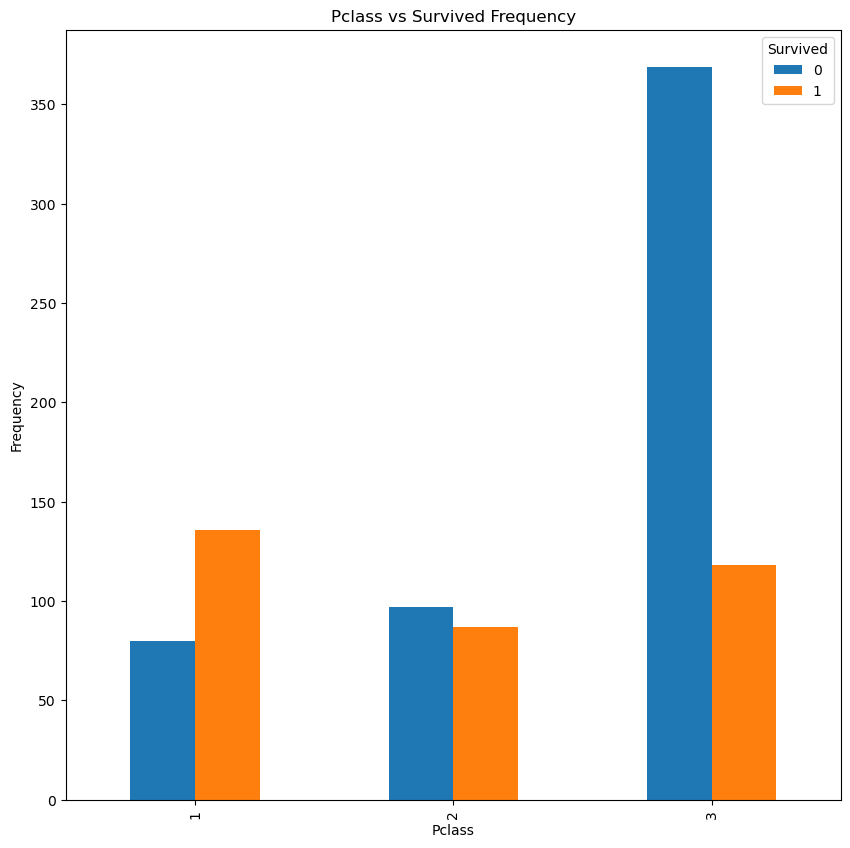

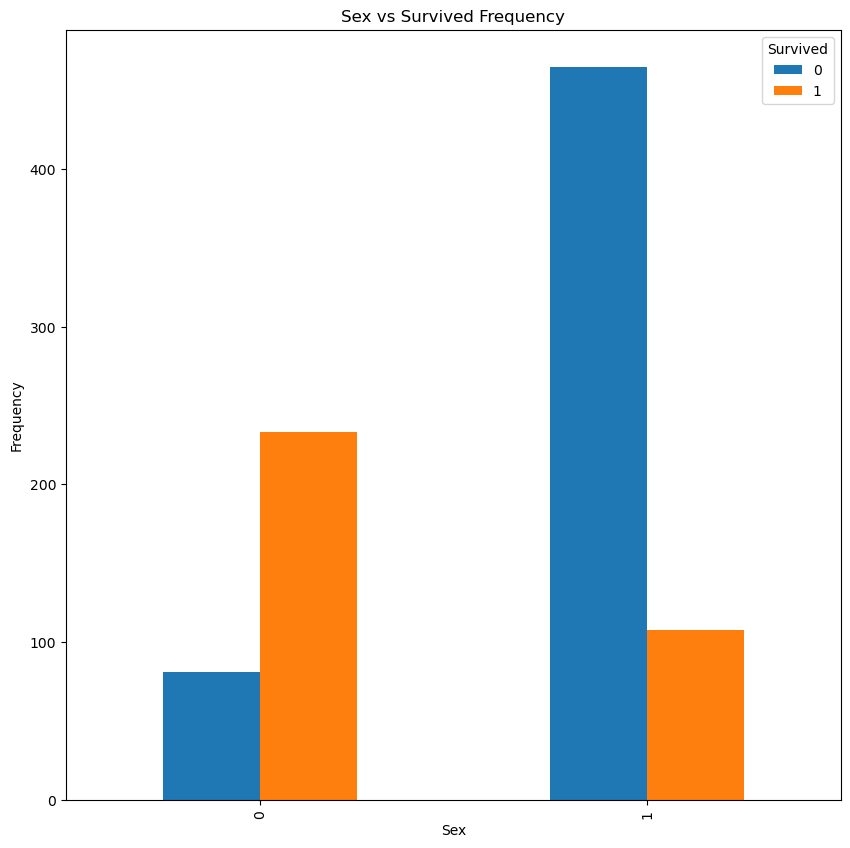

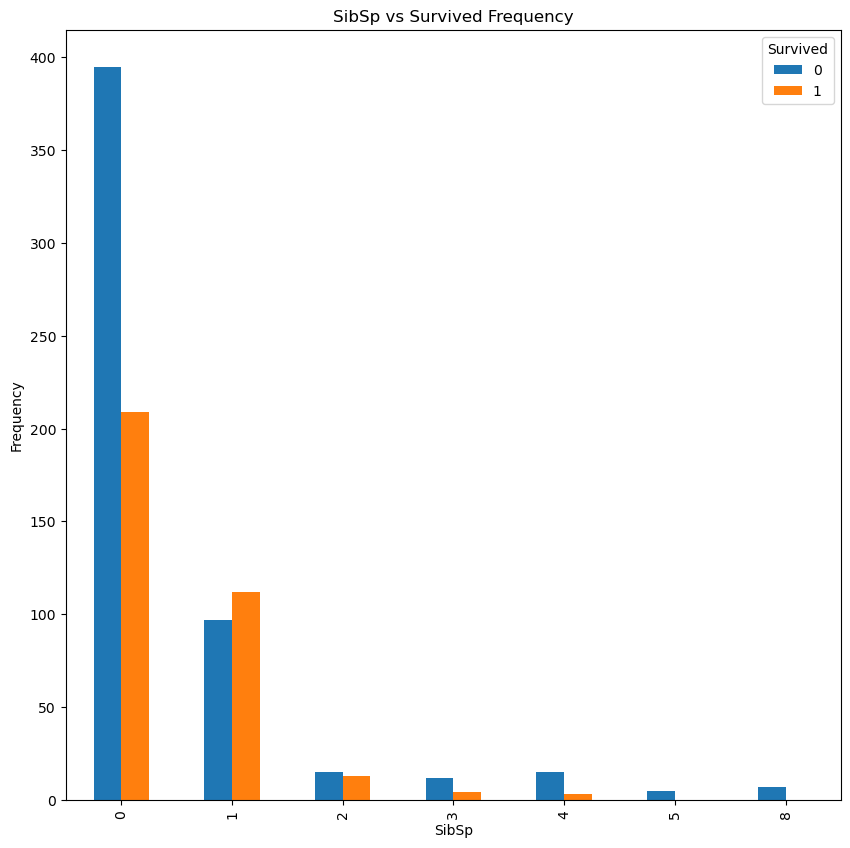

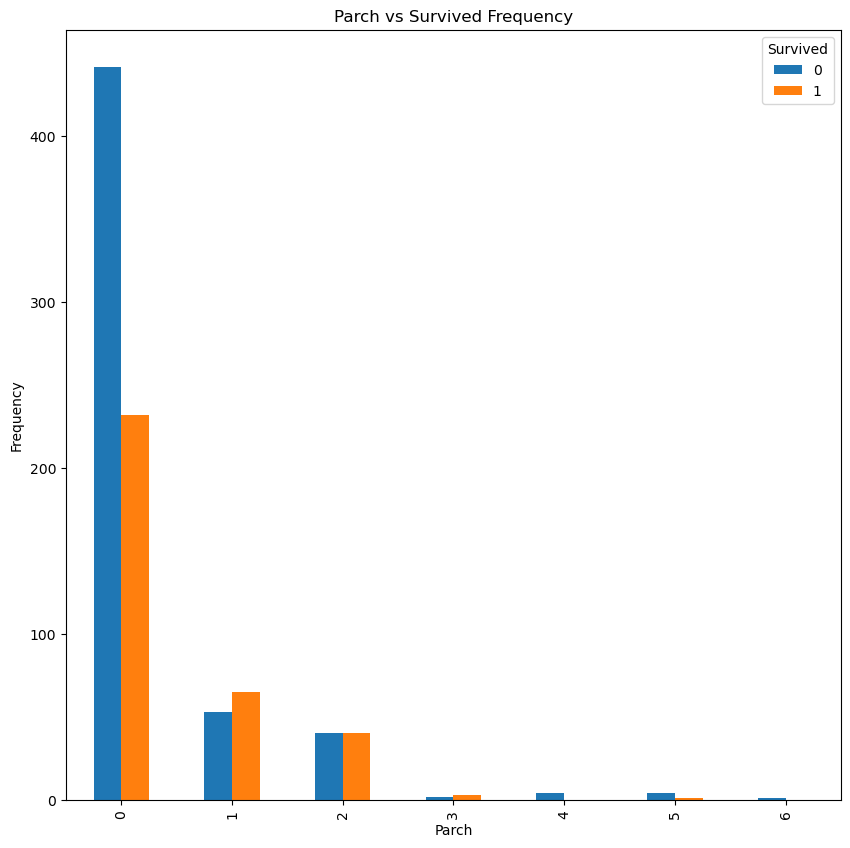

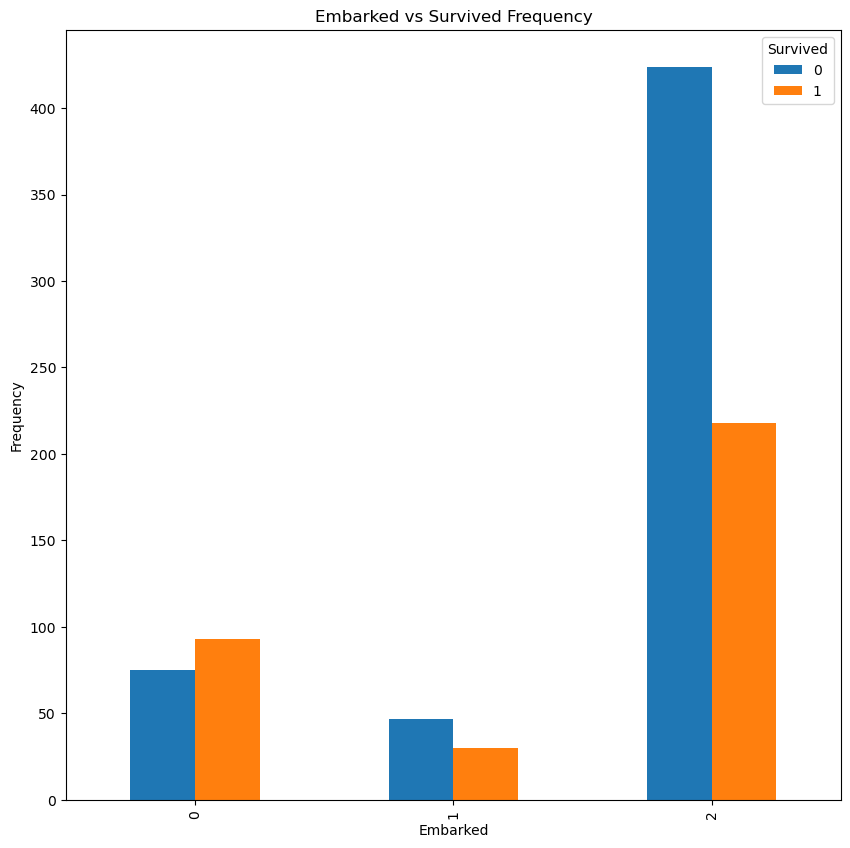

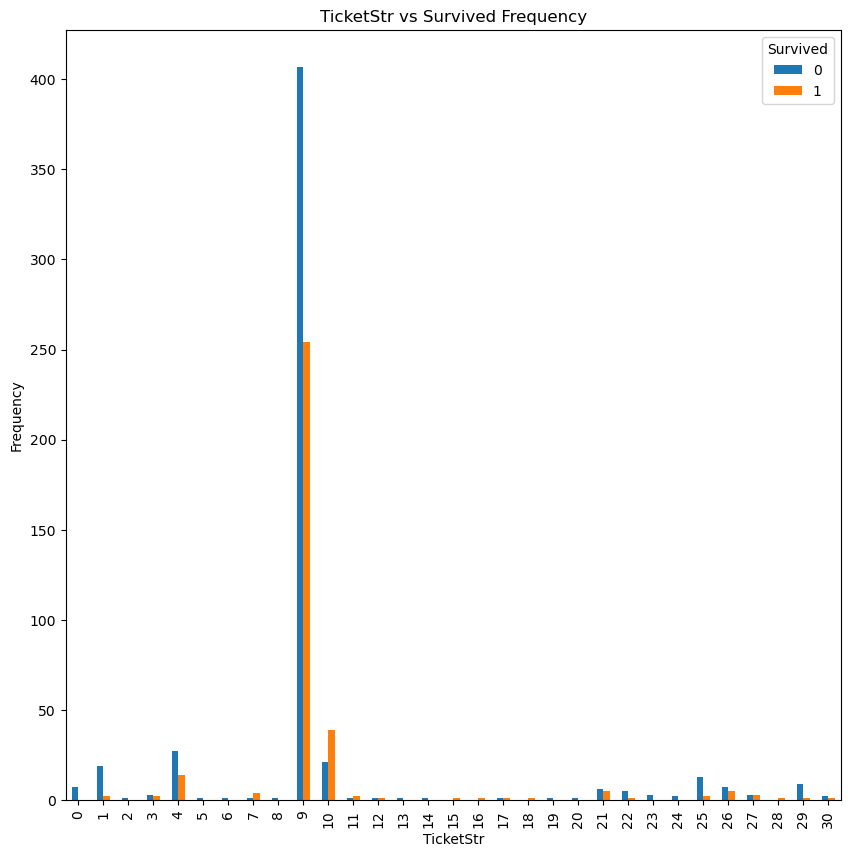

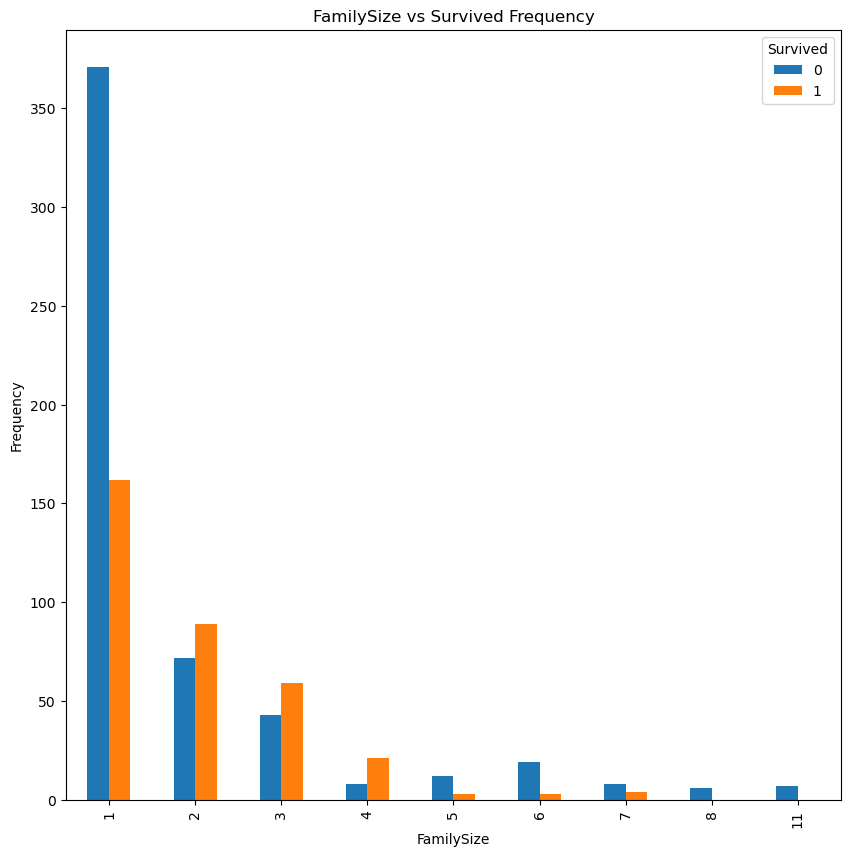

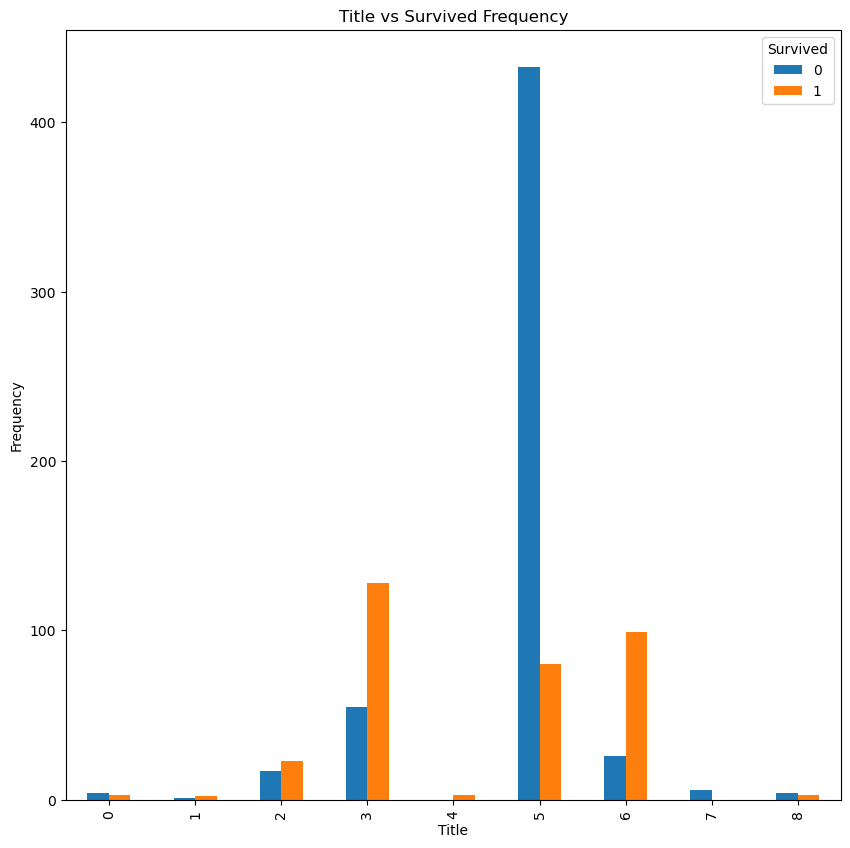

In [2]:
for column in train_df.columns[(train_df.columns != 'Survived') 
                               & (train_df.columns != 'PassengerId')
                               &(train_df.columns != 'Age')
                               &(train_df.columns != 'Fare')
                               &(train_df.columns != 'TicketNum')]:
    pd.crosstab(train_df[column],train_df['Survived']).plot(kind="bar",figsize=(10,10))
    plt.title(f'{column} vs Survived Frequency')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

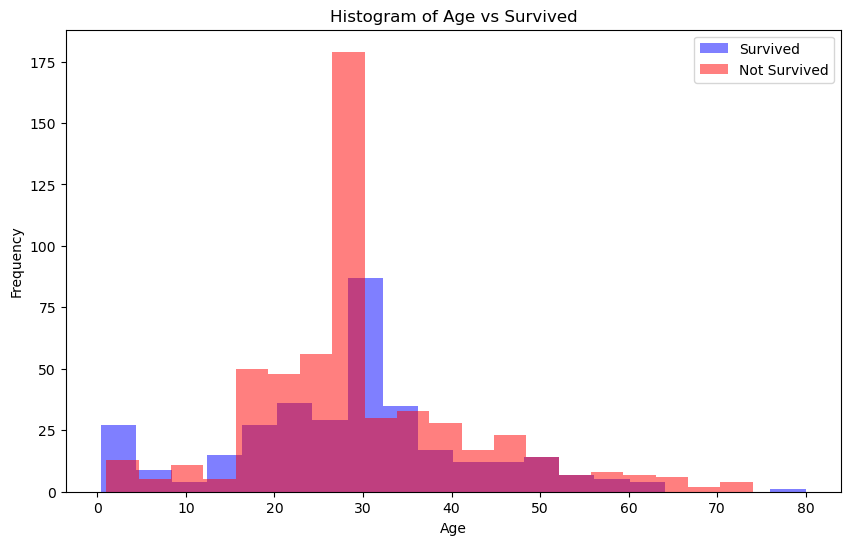

In [3]:
survived_ages = train_df[train_df['Survived'] == 1]['Age'].dropna()
not_survived_ages = train_df[train_df['Survived'] == 0]['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(survived_ages, bins=20, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived_ages, bins=20, alpha=0.5, label='Not Survived', color='red')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age vs Survived')
plt.legend()

plt.show()

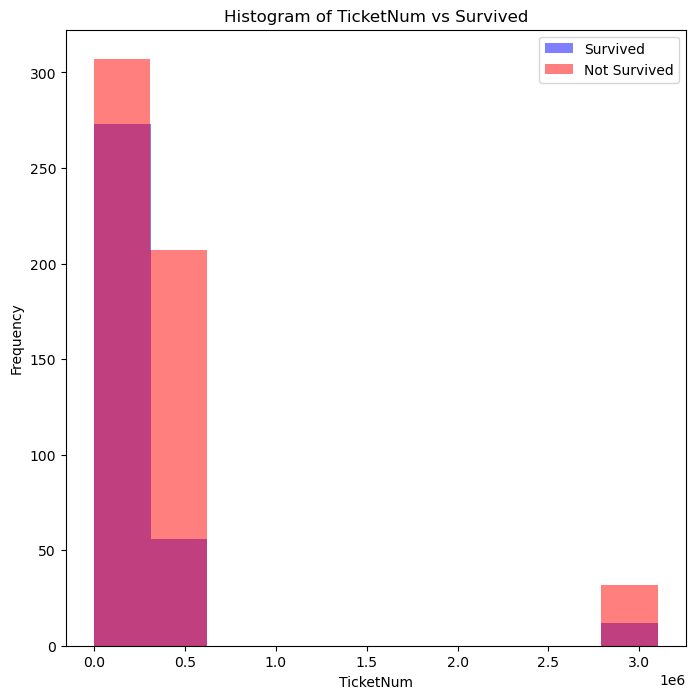

In [4]:
survived_ages = train_df[train_df['Survived'] == 1]['TicketNum'].dropna()
not_survived_ages = train_df[train_df['Survived'] == 0]['TicketNum'].dropna()

plt.figure(figsize=(8, 8))
plt.hist(survived_ages, bins=10, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived_ages, bins=10, alpha=0.5, label='Not Survived', color='red')

plt.xlabel('TicketNum')
plt.ylabel('Frequency')
plt.title('Histogram of TicketNum vs Survived')
plt.legend()

plt.show()

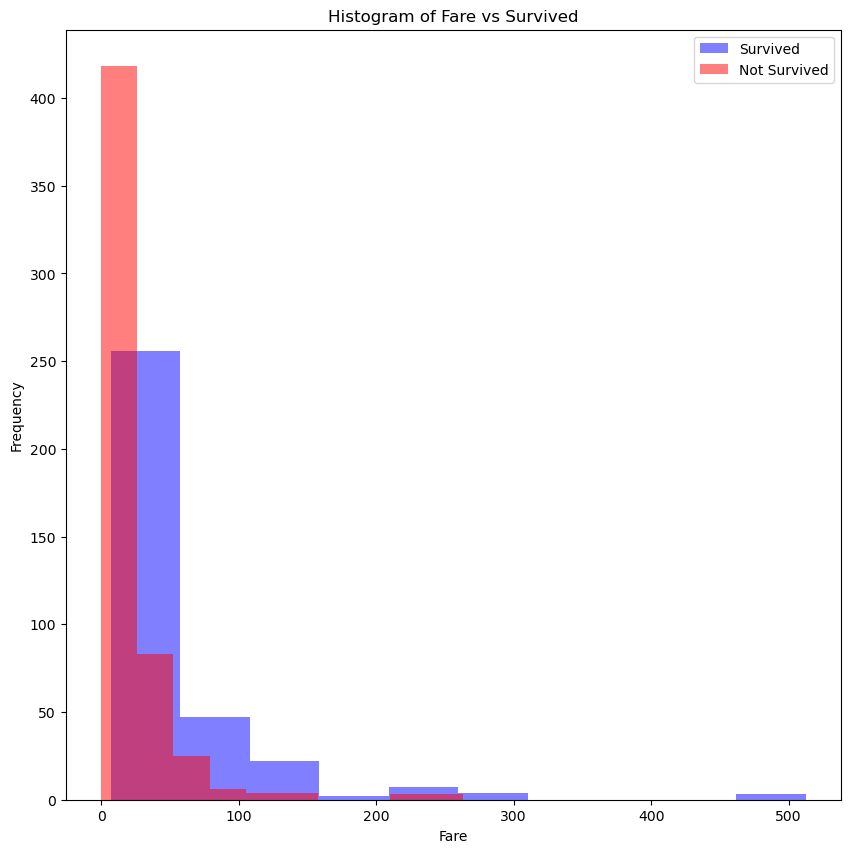

In [5]:
survived_ages = train_df[train_df['Survived'] == 1]['Fare'].dropna()
not_survived_ages = train_df[train_df['Survived'] == 0]['Fare'].dropna()

plt.figure(figsize=(10, 10))
plt.hist(survived_ages, bins=10, alpha=0.5, label='Survived', color='blue')
plt.hist(not_survived_ages, bins=10, alpha=0.5, label='Not Survived', color='red')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare vs Survived')
plt.legend()

plt.show()

In [6]:
# Load Test Dataset
test_df = pd.read_csv("./processed_data/preprocessed_test_data.csv")
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketNum,TicketStr,FamilySize,Title
0,892,3,1,34.5,0,0,7.83,1,330911,10,0,4
1,893,3,0,47.0,1,0,7.00,2,363272,10,1,5
2,894,2,1,62.0,0,0,9.69,1,240276,10,0,4
3,895,3,1,27.0,0,0,8.66,2,315154,10,0,4
4,896,3,0,22.0,1,1,12.29,2,3101298,10,2,5


In [7]:
y = train_df['Survived']
X = train_df.iloc[:, train_df.columns != 'Survived']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 80.16%
The accuracy for the test set is 81.65%


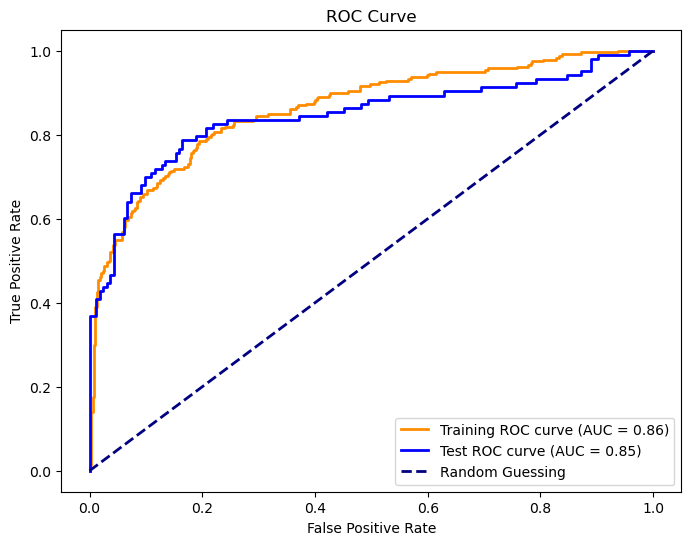

In [9]:
y_prob_train = model.predict_proba(X_train_scaled)[:, 1]
y_prob_test = model.predict_proba(X_test_scaled)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training ROC curve (AUC = {:.2f})'.format(roc_auc_train))

plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = {:.2f})'.format(roc_auc_test))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.show()

In [10]:
X_test_new_scaled = pd.DataFrame(scaler.transform(test_df), columns=X_test_scaled.columns)

predictions = model.predict(X_test_new_scaled)

In [11]:
import pandas as pd

submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission_df.to_csv('submission.csv', index=False)
